## Problem Set 3
### MACS 30200
### Leoson Hoay

**Importing necessary packages:**

In [1]:
from keras.datasets import mnist
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler

C:\Users\leoso\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Part 1: Image classification

**(i) Initial test**

In [2]:
# set the seed
random.seed(171276)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# reshape into 2D tensor
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# standardize to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
def baseline_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Split into training and validation sets
X_train_partial = X_train[0:50000]
X_train_val = X_train[-10000:]
y_train_partial = y_train[0:50000]
y_train_val =  y_train[-10000:]

In [7]:
# Estimate initial model
model = baseline_model()

history = model.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores = model.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 4s - loss: 0.4903 - acc: 0.8445 - val_loss: 0.2278 - val_acc: 0.9285
Epoch 2/200
 - 4s - loss: 0.1554 - acc: 0.9527 - val_loss: 0.0978 - val_acc: 0.9728
Epoch 3/200
 - 4s - loss: 0.0942 - acc: 0.9712 - val_loss: 0.1018 - val_acc: 0.9714
Epoch 4/200
 - 4s - loss: 0.0612 - acc: 0.9808 - val_loss: 0.0896 - val_acc: 0.9747
Epoch 5/200
 - 4s - loss: 0.0474 - acc: 0.9852 - val_loss: 0.0939 - val_acc: 0.9740
Epoch 6/200
 - 4s - loss: 0.0350 - acc: 0.9895 - val_loss: 0.2393 - val_acc: 0.9473
Epoch 7/200
 - 5s - loss: 0.0280 - acc: 0.9919 - val_loss: 0.0924 - val_acc: 0.9784
Epoch 8/200
 - 4s - loss: 0.0259 - acc: 0.9926 - val_loss: 0.0973 - val_acc: 0.9786
Epoch 9/200
 - 4s - loss: 0.0191 - acc: 0.9944 - val_loss: 0.1051 - val_acc: 0.9791
Epoch 10/200
 - 5s - loss: 0.0160 - acc: 0.9953 - val_loss: 0.1047 - val_acc: 0.9789
Epoch 11/200
 - 5s - loss: 0.0138 - acc: 0.9955 - val_loss: 0.1408 - val_acc: 0.9731
Epoch 12/200
 - 4s - los

Epoch 97/200
 - 4s - loss: 0.0064 - acc: 0.9992 - val_loss: 0.1808 - val_acc: 0.9820
Epoch 98/200
 - 4s - loss: 0.0101 - acc: 0.9987 - val_loss: 0.1797 - val_acc: 0.9812
Epoch 99/200
 - 4s - loss: 0.0047 - acc: 0.9992 - val_loss: 0.2152 - val_acc: 0.9795
Epoch 100/200
 - 4s - loss: 0.0052 - acc: 0.9993 - val_loss: 0.1844 - val_acc: 0.9828
Epoch 101/200
 - 4s - loss: 0.0067 - acc: 0.9992 - val_loss: 0.1748 - val_acc: 0.9830
Epoch 102/200
 - 4s - loss: 0.0068 - acc: 0.9991 - val_loss: 0.1982 - val_acc: 0.9828
Epoch 103/200
 - 4s - loss: 0.0075 - acc: 0.9991 - val_loss: 0.2684 - val_acc: 0.9765
Epoch 104/200
 - 4s - loss: 0.0068 - acc: 0.9990 - val_loss: 0.1847 - val_acc: 0.9831
Epoch 105/200
 - 4s - loss: 0.0104 - acc: 0.9986 - val_loss: 0.1947 - val_acc: 0.9807
Epoch 106/200
 - 4s - loss: 0.0056 - acc: 0.9993 - val_loss: 0.1867 - val_acc: 0.9808
Epoch 107/200
 - 4s - loss: 0.0050 - acc: 0.9992 - val_loss: 0.1764 - val_acc: 0.9822
Epoch 108/200
 - 4s - loss: 0.0045 - acc: 0.9993 - val_lo

Epoch 193/200
 - 4s - loss: 0.0047 - acc: 0.9996 - val_loss: 0.2079 - val_acc: 0.9838
Epoch 194/200
 - 4s - loss: 0.0024 - acc: 0.9997 - val_loss: 0.2208 - val_acc: 0.9831
Epoch 195/200
 - 4s - loss: 0.0031 - acc: 0.9997 - val_loss: 0.2196 - val_acc: 0.9832
Epoch 196/200
 - 4s - loss: 0.0046 - acc: 0.9996 - val_loss: 0.1963 - val_acc: 0.9841
Epoch 197/200
 - 4s - loss: 0.0055 - acc: 0.9995 - val_loss: 0.2411 - val_acc: 0.9818
Epoch 198/200
 - 4s - loss: 0.0042 - acc: 0.9995 - val_loss: 0.2347 - val_acc: 0.9823
Epoch 199/200
 - 4s - loss: 0.0066 - acc: 0.9994 - val_loss: 0.2205 - val_acc: 0.9825
Epoch 200/200
 - 4s - loss: 0.0063 - acc: 0.9995 - val_loss: 0.2225 - val_acc: 0.9836
Baseline Error: 1.64%


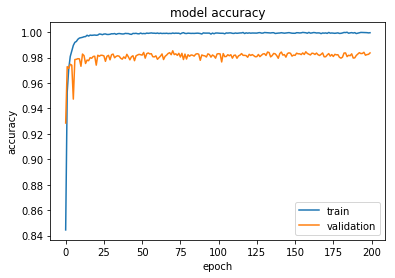

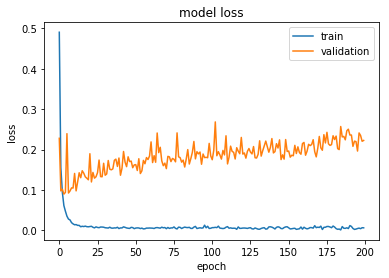

In [8]:
# Accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [9]:
# get epoch index of minimum loss value
val, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
idx

3

The minimum loss on the validation set occurs at around epoch 3, after which the model's performance seems to be on a degrading trend from epoch 4 onwards.

**(ii) Implement dropout**

In [10]:
def dropout_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [11]:
# Estimate dropout model
model2 = dropout_model()

history2 = model2.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores2 = model.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores2[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 6s - loss: 0.7562 - acc: 0.7485 - val_loss: 0.2148 - val_acc: 0.9379
Epoch 2/200
 - 5s - loss: 0.2869 - acc: 0.9177 - val_loss: 0.1336 - val_acc: 0.9627
Epoch 3/200
 - 5s - loss: 0.2141 - acc: 0.9388 - val_loss: 0.1128 - val_acc: 0.9681
Epoch 4/200
 - 5s - loss: 0.1735 - acc: 0.9503 - val_loss: 0.0990 - val_acc: 0.9714
Epoch 5/200
 - 5s - loss: 0.1526 - acc: 0.9569 - val_loss: 0.0902 - val_acc: 0.9744
Epoch 6/200
 - 5s - loss: 0.1382 - acc: 0.9614 - val_loss: 0.0925 - val_acc: 0.9747
Epoch 7/200
 - 5s - loss: 0.1207 - acc: 0.9653 - val_loss: 0.0838 - val_acc: 0.9769
Epoch 8/200
 - 5s - loss: 0.1115 - acc: 0.9685 - val_loss: 0.0809 - val_acc: 0.9787
Epoch 9/200
 - 5s - loss: 0.1041 - acc: 0.9711 - val_loss: 0.0809 - val_acc: 0.9797
Epoch 10/200
 - 5s - loss: 0.0938 - acc: 0.9740 - val_loss: 0.0815 - val_acc: 0.9787
Epoch 11/200
 - 5s - loss: 0.0928 - acc: 0.9732 - val_loss: 0.0784 - val_acc: 0.9801
Epoch 12/200
 - 5s - los

Epoch 97/200
 - 5s - loss: 0.0512 - acc: 0.9905 - val_loss: 0.1249 - val_acc: 0.9831
Epoch 98/200
 - 5s - loss: 0.0554 - acc: 0.9908 - val_loss: 0.1229 - val_acc: 0.9830
Epoch 99/200
 - 5s - loss: 0.0544 - acc: 0.9914 - val_loss: 0.1301 - val_acc: 0.9825
Epoch 100/200
 - 5s - loss: 0.0595 - acc: 0.9907 - val_loss: 0.1334 - val_acc: 0.9825
Epoch 101/200
 - 5s - loss: 0.0594 - acc: 0.9909 - val_loss: 0.1210 - val_acc: 0.9817
Epoch 102/200
 - 5s - loss: 0.0588 - acc: 0.9915 - val_loss: 0.1385 - val_acc: 0.9838
Epoch 103/200
 - 5s - loss: 0.0557 - acc: 0.9916 - val_loss: 0.1357 - val_acc: 0.9827
Epoch 104/200
 - 5s - loss: 0.0598 - acc: 0.9909 - val_loss: 0.1269 - val_acc: 0.9832
Epoch 105/200
 - 5s - loss: 0.0553 - acc: 0.9909 - val_loss: 0.1317 - val_acc: 0.9822
Epoch 106/200
 - 5s - loss: 0.0553 - acc: 0.9910 - val_loss: 0.1183 - val_acc: 0.9835
Epoch 107/200
 - 5s - loss: 0.0577 - acc: 0.9910 - val_loss: 0.1182 - val_acc: 0.9842
Epoch 108/200
 - 5s - loss: 0.0623 - acc: 0.9906 - val_lo

Epoch 193/200
 - 6s - loss: 0.0695 - acc: 0.9925 - val_loss: 0.1782 - val_acc: 0.9828
Epoch 194/200
 - 6s - loss: 0.0786 - acc: 0.9919 - val_loss: 0.1667 - val_acc: 0.9845
Epoch 195/200
 - 6s - loss: 0.0721 - acc: 0.9924 - val_loss: 0.1773 - val_acc: 0.9836
Epoch 196/200
 - 6s - loss: 0.0813 - acc: 0.9919 - val_loss: 0.1752 - val_acc: 0.9833
Epoch 197/200
 - 6s - loss: 0.0697 - acc: 0.9928 - val_loss: 0.1879 - val_acc: 0.9825
Epoch 198/200
 - 6s - loss: 0.0811 - acc: 0.9912 - val_loss: 0.1738 - val_acc: 0.9834
Epoch 199/200
 - 6s - loss: 0.0811 - acc: 0.9917 - val_loss: 0.1764 - val_acc: 0.9828
Epoch 200/200
 - 6s - loss: 0.0797 - acc: 0.9922 - val_loss: 0.1720 - val_acc: 0.9832
Baseline Error: 1.64%


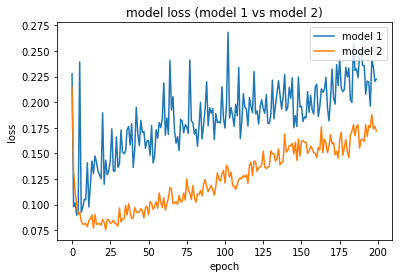

In [12]:
# validation Loss plot
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss (model 1 vs model 2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2'], loc='upper right')
plt.show()

Looking at the graph, the new model generally performs better in minimising validation loss across the epochs.

**(iii) Weight regularization**

In [13]:
def weight_l1_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [14]:
# Estimate weight-L1 model
model3 = weight_l1_model()

history3 = model3.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores3 = model.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores3[1]*100))

C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  """
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_r

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 6s - loss: 17.8153 - acc: 0.6917 - val_loss: 5.8688 - val_acc: 0.8528
Epoch 2/200
 - 5s - loss: 4.0261 - acc: 0.7950 - val_loss: 2.9979 - val_acc: 0.8107
Epoch 3/200
 - 5s - loss: 2.5425 - acc: 0.8280 - val_loss: 2.4896 - val_acc: 0.7313
Epoch 4/200
 - 5s - loss: 2.0476 - acc: 0.8519 - val_loss: 1.8386 - val_acc: 0.8840
Epoch 5/200
 - 5s - loss: 1.7837 - acc: 0.8694 - val_loss: 1.6745 - val_acc: 0.8851
Epoch 6/200
 - 5s - loss: 1.6305 - acc: 0.8795 - val_loss: 1.5749 - val_acc: 0.8812
Epoch 7/200
 - 5s - loss: 1.5238 - acc: 0.8883 - val_loss: 1.5241 - val_acc: 0.8790
Epoch 8/200
 - 5s - loss: 1.4476 - acc: 0.8964 - val_loss: 1.3812 - val_acc: 0.9099
Epoch 9/200
 - 5s - loss: 1.3908 - acc: 0.9024 - val_loss: 1.3149 - val_acc: 0.9214
Epoch 10/200
 - 5s - loss: 1.3460 - acc: 0.9074 - val_loss: 1.2768 - val_acc: 0.9257
Epoch 11/200
 - 5s - loss: 1.3041 - acc: 0.9135 - val_loss: 1.2376 - val_acc: 0.9321
Epoch 12/200
 - 5s - lo

Epoch 97/200
 - 5s - loss: 0.9144 - acc: 0.9583 - val_loss: 0.9715 - val_acc: 0.9388
Epoch 98/200
 - 5s - loss: 0.9140 - acc: 0.9581 - val_loss: 0.9182 - val_acc: 0.9611
Epoch 99/200
 - 5s - loss: 0.9126 - acc: 0.9583 - val_loss: 0.9389 - val_acc: 0.9546
Epoch 100/200
 - 5s - loss: 0.9135 - acc: 0.9583 - val_loss: 0.9041 - val_acc: 0.9609
Epoch 101/200
 - 5s - loss: 0.9120 - acc: 0.9582 - val_loss: 0.9102 - val_acc: 0.9591
Epoch 102/200
 - 5s - loss: 0.9110 - acc: 0.9587 - val_loss: 0.9510 - val_acc: 0.9499
Epoch 103/200
 - 5s - loss: 0.9122 - acc: 0.9578 - val_loss: 0.9119 - val_acc: 0.9580
Epoch 104/200
 - 5s - loss: 0.9126 - acc: 0.9578 - val_loss: 0.9026 - val_acc: 0.9614
Epoch 105/200
 - 5s - loss: 0.9086 - acc: 0.9595 - val_loss: 0.9133 - val_acc: 0.9607
Epoch 106/200
 - 5s - loss: 0.9104 - acc: 0.9588 - val_loss: 0.9273 - val_acc: 0.9534
Epoch 107/200
 - 5s - loss: 0.9089 - acc: 0.9593 - val_loss: 0.9041 - val_acc: 0.9621
Epoch 108/200
 - 5s - loss: 0.9113 - acc: 0.9582 - val_lo

Epoch 193/200
 - 5s - loss: 0.8806 - acc: 0.9624 - val_loss: 0.9551 - val_acc: 0.9377
Epoch 194/200
 - 5s - loss: 0.8821 - acc: 0.9617 - val_loss: 0.8963 - val_acc: 0.9614
Epoch 195/200
 - 5s - loss: 0.8833 - acc: 0.9609 - val_loss: 0.9476 - val_acc: 0.9387
Epoch 196/200
 - 5s - loss: 0.8841 - acc: 0.9616 - val_loss: 0.8884 - val_acc: 0.9606
Epoch 197/200
 - 5s - loss: 0.8804 - acc: 0.9626 - val_loss: 0.9129 - val_acc: 0.9526
Epoch 198/200
 - 5s - loss: 0.8818 - acc: 0.9622 - val_loss: 0.8905 - val_acc: 0.9603
Epoch 199/200
 - 5s - loss: 0.8828 - acc: 0.9615 - val_loss: 0.8999 - val_acc: 0.9591
Epoch 200/200
 - 5s - loss: 0.8802 - acc: 0.9622 - val_loss: 0.8749 - val_acc: 0.9652
Baseline Error: 1.64%


In [15]:
def weight_l2_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [17]:
# Estimate weight-L2 model
model4 = weight_l2_model()

history4 = model4.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores4 = model.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores4[1]*100))

C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  """
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_r

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 5s - loss: 2.3102 - acc: 0.8331 - val_loss: 1.3758 - val_acc: 0.9337
Epoch 2/200
 - 5s - loss: 1.0515 - acc: 0.9354 - val_loss: 0.7455 - val_acc: 0.9593
Epoch 3/200
 - 5s - loss: 0.6548 - acc: 0.9507 - val_loss: 0.5337 - val_acc: 0.9573
Epoch 4/200
 - 5s - loss: 0.4776 - acc: 0.9581 - val_loss: 0.5662 - val_acc: 0.9112
Epoch 5/200
 - 5s - loss: 0.3838 - acc: 0.9638 - val_loss: 0.3347 - val_acc: 0.9695
Epoch 6/200
 - 5s - loss: 0.3228 - acc: 0.9676 - val_loss: 0.2796 - val_acc: 0.9739
Epoch 7/200
 - 5s - loss: 0.2894 - acc: 0.9697 - val_loss: 0.2923 - val_acc: 0.9683
Epoch 8/200
 - 5s - loss: 0.2587 - acc: 0.9731 - val_loss: 0.3353 - val_acc: 0.9460
Epoch 9/200
 - 5s - loss: 0.2389 - acc: 0.9743 - val_loss: 0.2805 - val_acc: 0.9615
Epoch 10/200
 - 5s - loss: 0.2236 - acc: 0.9759 - val_loss: 0.2095 - val_acc: 0.9772
Epoch 11/200
 - 5s - loss: 0.2078 - acc: 0.9771 - val_loss: 0.2002 - val_acc: 0.9785
Epoch 12/200
 - 5s - los

Epoch 97/200
 - 5s - loss: 0.0871 - acc: 0.9913 - val_loss: 0.1336 - val_acc: 0.9764
Epoch 98/200
 - 5s - loss: 0.0868 - acc: 0.9913 - val_loss: 0.1356 - val_acc: 0.9767
Epoch 99/200
 - 5s - loss: 0.0856 - acc: 0.9922 - val_loss: 0.1550 - val_acc: 0.9720
Epoch 100/200
 - 5s - loss: 0.0865 - acc: 0.9918 - val_loss: 0.1576 - val_acc: 0.9753
Epoch 101/200
 - 5s - loss: 0.0861 - acc: 0.9919 - val_loss: 0.1298 - val_acc: 0.9791
Epoch 102/200
 - 5s - loss: 0.0862 - acc: 0.9918 - val_loss: 0.1330 - val_acc: 0.9778
Epoch 103/200
 - 5s - loss: 0.0839 - acc: 0.9922 - val_loss: 0.1221 - val_acc: 0.9816
Epoch 104/200
 - 5s - loss: 0.0885 - acc: 0.9907 - val_loss: 0.1297 - val_acc: 0.9792
Epoch 105/200
 - 5s - loss: 0.0845 - acc: 0.9915 - val_loss: 0.1370 - val_acc: 0.9770
Epoch 106/200
 - 5s - loss: 0.0851 - acc: 0.9915 - val_loss: 0.1240 - val_acc: 0.9813
Epoch 107/200
 - 5s - loss: 0.0847 - acc: 0.9915 - val_loss: 0.1327 - val_acc: 0.9784
Epoch 108/200
 - 5s - loss: 0.0865 - acc: 0.9916 - val_lo

Epoch 193/200
 - 5s - loss: 0.0781 - acc: 0.9921 - val_loss: 0.1425 - val_acc: 0.9749
Epoch 194/200
 - 5s - loss: 0.0762 - acc: 0.9923 - val_loss: 0.1292 - val_acc: 0.9803
Epoch 195/200
 - 5s - loss: 0.0750 - acc: 0.9933 - val_loss: 0.1792 - val_acc: 0.9632
Epoch 196/200
 - 5s - loss: 0.0775 - acc: 0.9920 - val_loss: 0.1350 - val_acc: 0.9779
Epoch 197/200
 - 5s - loss: 0.0742 - acc: 0.9929 - val_loss: 0.2031 - val_acc: 0.9647
Epoch 198/200
 - 5s - loss: 0.0769 - acc: 0.9921 - val_loss: 0.1364 - val_acc: 0.9738
Epoch 199/200
 - 5s - loss: 0.0758 - acc: 0.9928 - val_loss: 0.1334 - val_acc: 0.9775
Epoch 200/200
 - 5s - loss: 0.0733 - acc: 0.9930 - val_loss: 0.1210 - val_acc: 0.9802
Baseline Error: 1.64%


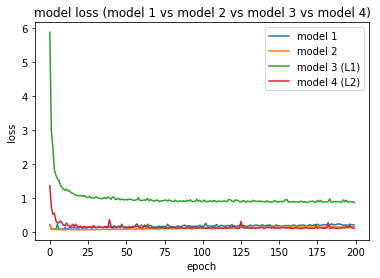

In [18]:
# validation Loss plot
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss (model 1 vs model 2 vs model 3 vs model 4)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2', 'model 3 (L1)', 'model 4 (L2)'], loc='upper right')
plt.show()

**(iv) Final Model**

### Part 2: Scalar regression 

In [ ]:
(X_train2, y_train2), (X_test2, y_test2) = boston_housing.load_data()

In [ ]:
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2_scaled = scaler.transform(X_train2)
scaler2 = StandardScaler()
scaler2.fit(X_test2)
X_test2_scaled = scaler2.transform(X_test2)

In [ ]:
def scalar_reg_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train2.shape()[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [ ]:
len(y_train)